In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('baseball.csv')

# EDA

In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
#We change the abbreviation of the columns with their meaning

#Column names as described in the problem statement
col=['wins','runs','at bats','hits','doubles','triples','homeruns','walks','strike_outs','stolen_bases','runs_allowed',
    'earned_runs','earned_run_average','complet_games','shutouts','saves','errors']

df.columns=col
df.head()

,wins,runs,at bats,hits,doubles,triples,homeruns,walks,strike_outs,stolen_bases,runs_allowed,earned_runs,earned_run_average,complet_games,shutouts,saves,errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Now the Dataset looks more meaningful.

In [5]:
df.shape

(30, 17)

Dataset have 30 rows and 17 columns

In [6]:
df.isnull().sum()

wins                  0
runs                  0
at bats               0
hits                  0
doubles               0
triples               0
homeruns              0
walks                 0
strike_outs           0
stolen_bases          0
runs_allowed          0
earned_runs           0
earned_run_average    0
complet_games         0
shutouts              0
saves                 0
errors                0
dtype: int64

There are no missing values in the dataset

In [7]:
df.dtypes

wins                    int64
runs                    int64
at bats                 int64
hits                    int64
doubles                 int64
triples                 int64
homeruns                int64
walks                   int64
strike_outs             int64
stolen_bases            int64
runs_allowed            int64
earned_runs             int64
earned_run_average    float64
complet_games           int64
shutouts                int64
saves                   int64
errors                  int64
dtype: object

All the columns have numerical values. Earned run average column is of float type while rest of the columns have integer type values

In [8]:
df.nunique()

wins                  24
runs                  28
at bats               29
hits                  29
doubles               22
triples               23
homeruns              27
walks                 29
strike_outs           29
stolen_bases          27
runs_allowed          30
earned_runs           30
earned_run_average    30
complet_games          9
shutouts              12
saves                 20
errors                21
dtype: int64

Since this is a small dataset of 30 rows, all the columns have continuous values.

In [9]:
df.skew()

wins                  0.047089
runs                  1.200786
at bats               0.183437
hits                  0.670254
doubles              -0.230650
triples               0.129502
homeruns              0.516441
walks                 0.158498
strike_outs          -0.156065
stolen_bases          0.479893
runs_allowed          0.045734
earned_runs           0.058710
earned_run_average    0.053331
complet_games         0.736845
shutouts              0.565790
saves                 0.657524
errors                0.890132
dtype: float64

Few features are highly skewed such as runs,hits,homeruns,complete games, shutouts, saves, errors. We need to handle them.

In [10]:
df.describe()

,wins,runs,at bats,hits,doubles,triples,homeruns,walks,strike_outs,stolen_bases,runs_allowed,earned_runs,earned_run_average,complet_games,shutouts,saves,errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


All the columns have count equal to 30 that means no missing values. Mean is close to median in some columns reprsenting some what gaussian distribution, but for column such as homeruns where mean is greater than median, it shows that data is right skewed, and where mean is less than median such as strike outs, in this case data is skewed towards right. Variance for earned run average is close to zero while it is high for all the other columns. Min, Max and Interquartile range of some columns such as runs column have high difference signifying presence of outliers.

### Univariate Analysis

Maximum wins are 891
Minimum wins are 573


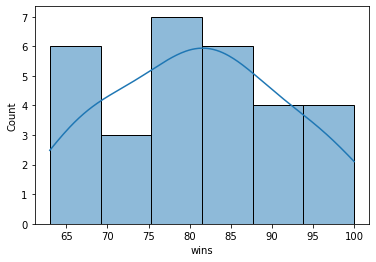

In [11]:
sns.histplot(df['wins'],kde=True)
print('Maximum wins are',df['runs'].max())
print('Minimum wins are',df['runs'].min())

Most wins are 100 and there are 4 teams with such record while least is around 60. There are seven teams which have wins ranging from 69 to 82, that is the highest no. of teams with the same wins and the minimum no. of teams with the same wins are 3 with 70 to 75 wins. Further the data is somewhat normally distributed.

Maximum runs scored are 891
Minimum runs scored are 573


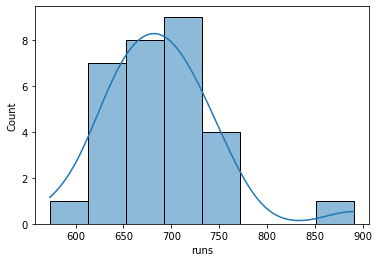

In [12]:
sns.histplot(df['runs'],kde=True)
print('Maximum runs scored are',df['runs'].max())
print('Minimum runs scored are',df['runs'].min())

High Variance. Data skewed towards right. There no runs scored in the range 775 to 850 while the maximum count is 9 which fall under the range 695 to 740. Highest runs scored seem to fall in the outliers category.

Maximum at bats 5649
Minimum at bats 5385


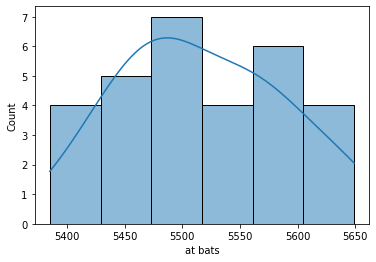

In [13]:
sns.histplot(df['at bats'],kde=True)
print('Maximum at bats',df['at bats'].max())
print('Minimum at bats',df['at bats'].min())

Variance is low in the column, There are three ranges with minimum count equalt to 4 and the highest count is 7 that fall in the range from 5430 to 5520.

Maximum hits are 1515
Minimumn hits are 1324


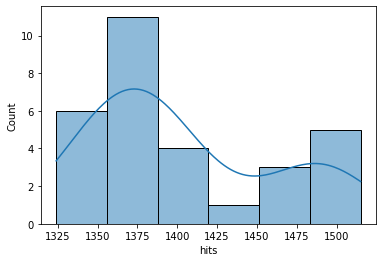

In [14]:
sns.histplot(df['hits'],kde=True)
print('Maximum hits are',df['hits'].max())
print('Minimumn hits are',df['hits'].min())

Data is highly skewed towards right with mean greater than median. Highest count of hits is 11 in the range 1360 to 188 and minimum count is 1 in the range 1420 to 1452.

Maximum doubles are 308
Minimum doubles are 236


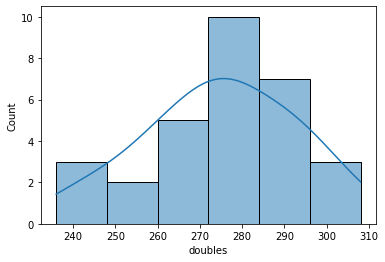

In [15]:
sns.histplot(df['doubles'],kde=True)
print('Maximum doubles are',df['doubles'].max())
print('Minimum doubles are',df['doubles'].min())

There is high variance and data is skewed towards left with median greater than mean. Highest count of doubles is 10 in the range 272 to 284 and minimum count is 2 in the range 248 to 260.

Maximum triples are 49
Minimum triples are 13


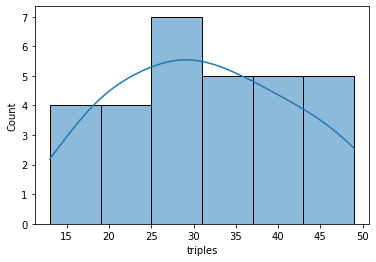

In [16]:
sns.histplot(df['triples'],kde=True)
print('Maximum triples are',df['triples'].max())
print('Minimum triples are',df['triples'].min())

Triples do not have high variance, Maximum tiples count is 7 in the range 25 to 31 and Maximum tiples count is 4 in the range 13 to 19.

Maximum homeruns are 232
Minimum homeruns are 100


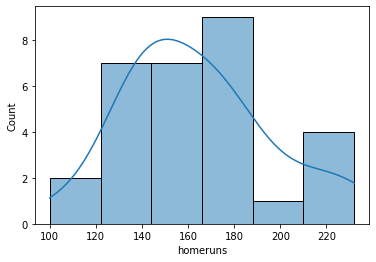

In [17]:
sns.histplot(df['homeruns'],kde=True)
print('Maximum homeruns are',df['homeruns'].max())
print('Minimum homeruns are',df['homeruns'].min())

Maximum no. of homeruns lie in the range 210 to 232 with 4 counts and minimum are 100 t0 123 with only 2 counts. Maximum counts of homeruns are 9 falling in the range 165 to 170.

Maximum walks are 570
Minimum walks are 375


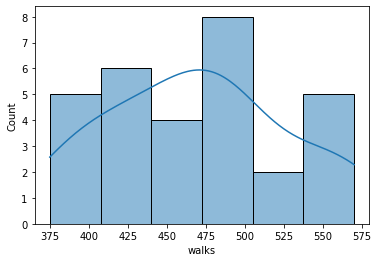

In [18]:
sns.histplot(df['walks'],kde=True)
print('Maximum walks are',df['walks'].max())
print('Minimum walks are',df['walks'].min())

Highest walks range from 470 to 505 with count eual to 8 and minimum walks range from 505 to 540 with count 2. Data seems to be distributed normally.

Maximum strike_outs are 1518
Minimum strike_outs are 973


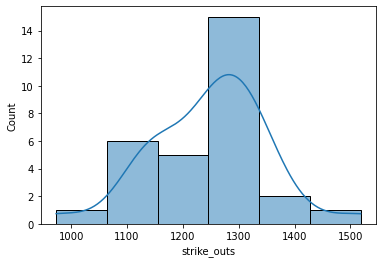

In [19]:
sns.histplot(df['strike_outs'],kde=True)
print('Maximum strike_outs are',df['strike_outs'].max())
print('Minimum strike_outs are',df['strike_outs'].min())

Maximum strike outs are 1500 and minimum is 1000 and both have minimum counts eqaul to 1 whereas maximum count of strike outs is 15 in the range 1250 to 1340. Second highest count of strike outs is less than than half the counts of highest one.

Maximum stolen_bases are 134
Minimum stolen_bases are 44


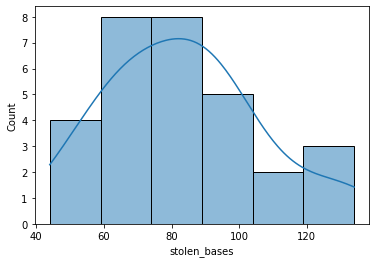

In [20]:
sns.histplot(df['stolen_bases'],kde=True)
print('Maximum stolen_bases are',df['stolen_bases'].max())
print('Minimum stolen_bases are',df['stolen_bases'].min())

Maximum stolen bases are around 130 with 3 counts and minimum around 50 with 4 counts. Maximum count for stolen bases is 8 ranging from 59 to 90 whereas minimum count is 2 in the range 105 to 119.

Maximum runs_allowed are 844
Minimum runs_allowed are 525


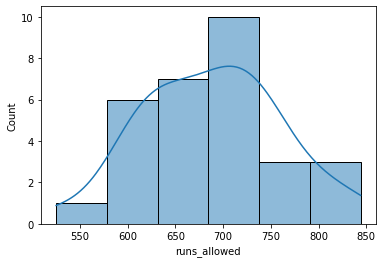

In [21]:
sns.histplot(df['runs_allowed'],kde=True)
print('Maximum runs_allowed are',df['runs_allowed'].max())
print('Minimum runs_allowed are',df['runs_allowed'].min())

Maximum runs allowed are 850 by only 3 teams and minimum are 550 by only 1 team. Highest no, of count is 10 which fall in the range 640 to 690.

Maximum earned_runs are 799
Minimum earned_runs are 478


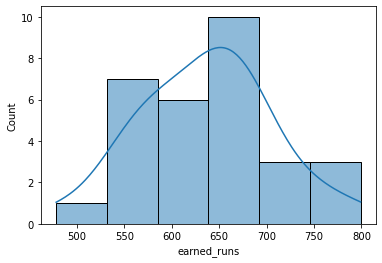

In [22]:
sns.histplot(df['earned_runs'],kde=True)
print('Maximum earned_runs are',df['earned_runs'].max())
print('Minimum earned_runs are',df['earned_runs'].min())

Data is almost normally distributed. Highest runs earned are 800 only by two teams and minimum are around 500 only by one team. Maximum no. of count is 10 falling in the range 640 to 690.

Maximum earned_run_average are 5.04
Minimum earned_run_average are 2.94


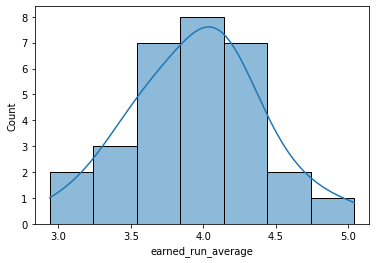

In [23]:
sns.histplot(df['earned_run_average'],kde=True)
print('Maximum earned_run_average are',df['earned_run_average'].max())
print('Minimum earned_run_average are',df['earned_run_average'].min())

Data is little bit skewed towards left, here median is greater than mean. Higher counts of average fall in the middle ranges, ranging from 3.6 to 4.4. Only one record is there where average runs earned are 5.

Maximum complet_games are 11
Minimum complet_games are 0


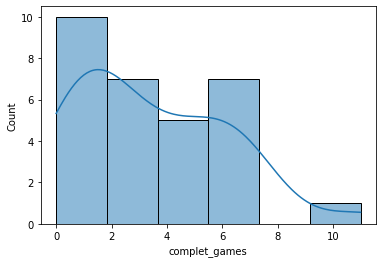

In [24]:
sns.histplot(df['complet_games'],kde=True)
print('Maximum complet_games are',df['complet_games'].max())
print('Minimum complet_games are',df['complet_games'].min())

Data is highly skewed towards right. Mean is greater than the median. Most count of complete games fall towards less no. of complete games. No team has played 8 complete games.

Maximum shutouts are 21
Minimum shutouts are 4


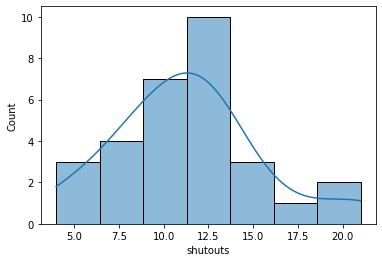

In [25]:
sns.histplot(df['shutouts'],kde=True)
print('Maximum shutouts are',df['shutouts'].max())
print('Minimum shutouts are',df['shutouts'].min())

Maximum count of shutouts is 10 in the range 11.5 to 13 amd minimum count is 1 in the range 16.25 to 18. Higher counts are in the low ranges of shutouts. Data is right skewed.

Maximum saves are 62
Minimum saves are 28


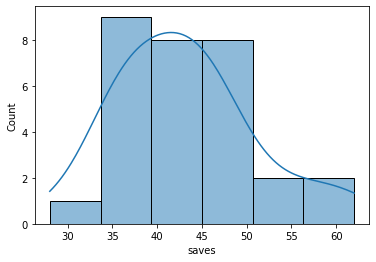

In [26]:
sns.histplot(df['saves'],kde=True)
print('Maximum saves are',df['saves'].max())
print('Minimum saves are',df['saves'].min())

Data is little bit skewed towards right. Highest count of saves are 9 which fall in the range 34 to 39 and minimum count is 1 where the no. of saves sall in the range 26 to 34.

Maximum errors are 126
Minimum errors are 75


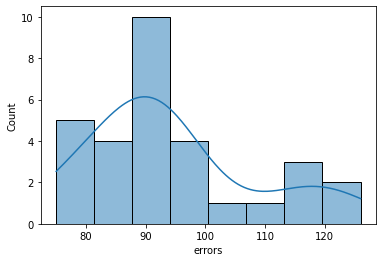

In [27]:
sns.histplot(df['errors'],kde=True)
print('Maximum errors are',df['errors'].max())
print('Minimum errors are',df['errors'].min())

Data is skewed towards right. Here mean is greater than the median. Highest count of errors fall from 88 to 94 with count 10 and the least count of error fall in the range 101 to 114. with the count 1.

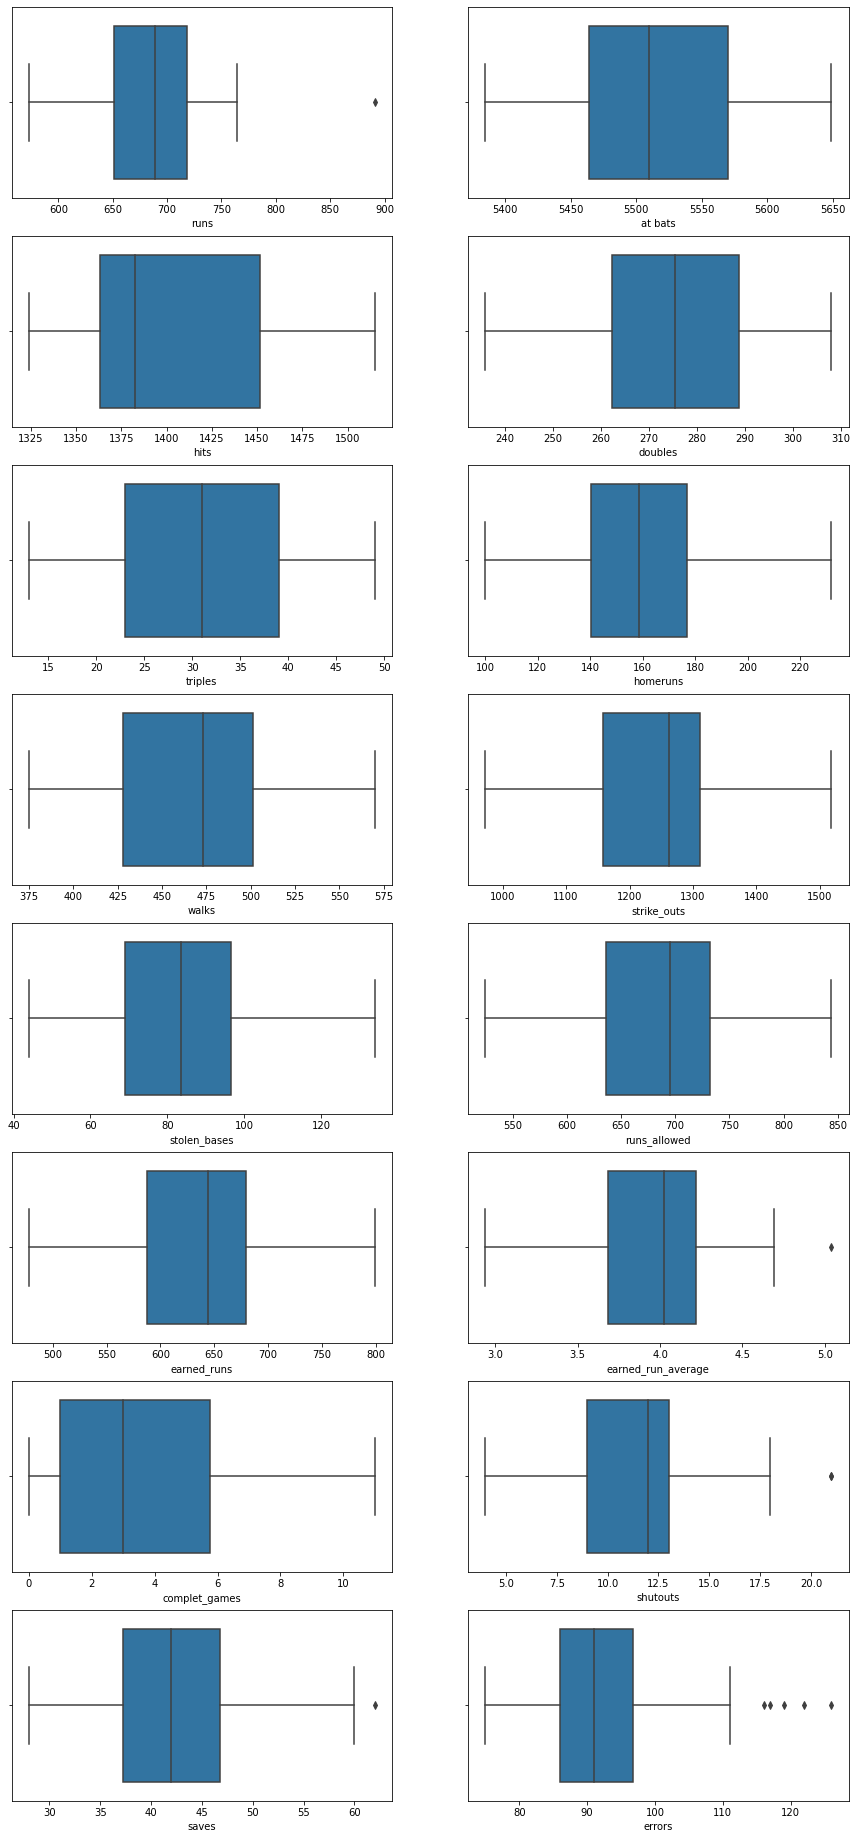

In [28]:
fig,ax=plt.subplots(8,2,figsize=(15,33))
r=0
c=0
for i,n in enumerate(df.columns[1:]):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.boxplot(df[n],ax=ax[r,c])
    c+=1

Except for the errors feature there are no are almost negligible outliers. Outlier from error columns need to be handled.

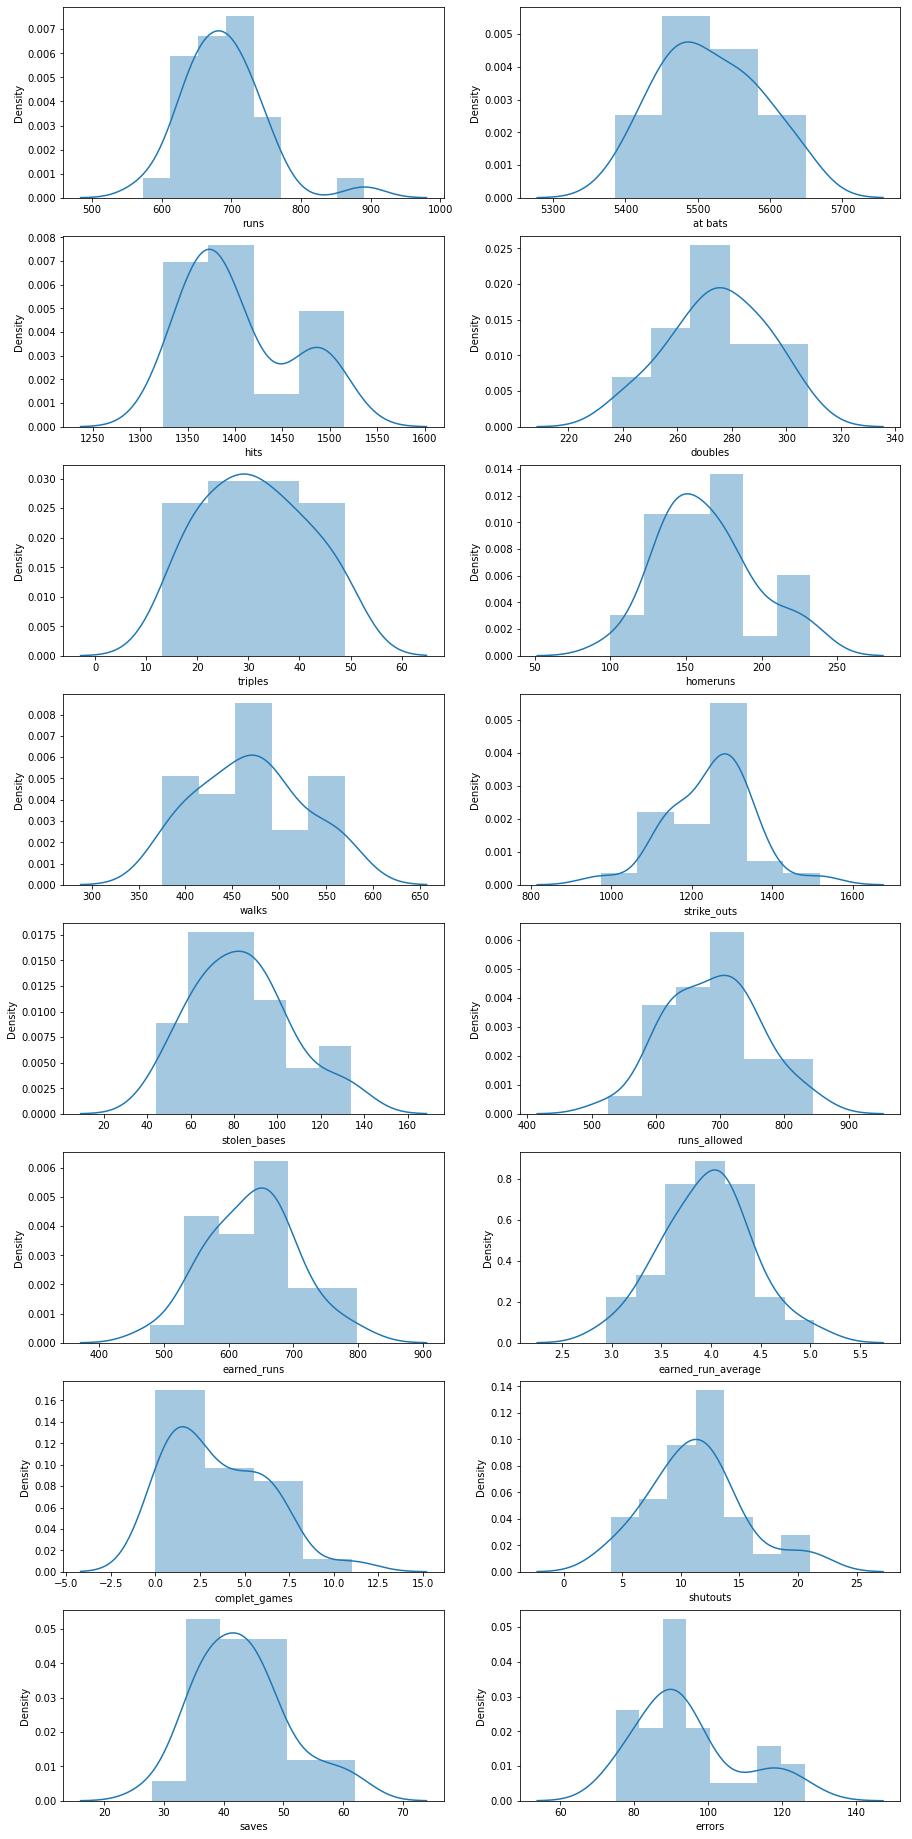

In [29]:
fig,ax=plt.subplots(8,2,figsize=(15,33))
r=0
c=0
for i,n in enumerate(df.columns[1:]):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.distplot(df[n],ax=ax[r,c])
    c+=1

Data is skewed in runs,hits,homeruns,complete games, shutouts, saves, errors columns rest other columns are almost normally distributed.

### Bivariate Analysis

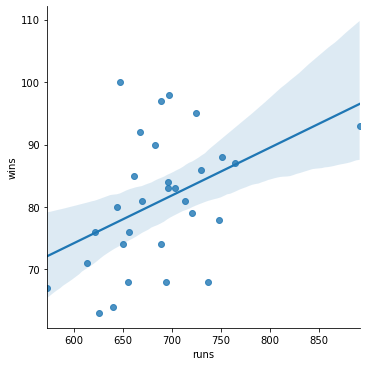

In [30]:
sns.lmplot(x='runs',y='wins',data=df)

As the runs increase,win also increases but presence of outliers are also there.

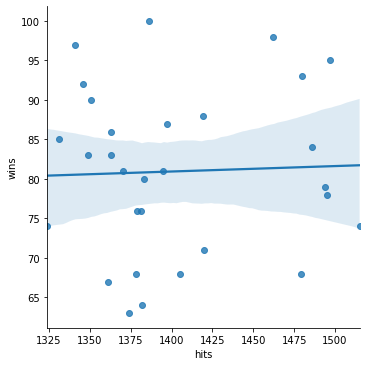

In [31]:
sns.lmplot(x='hits',y='wins',data=df)

Hits does not impact much on the wins feature as we can see the data is scattered throughout.

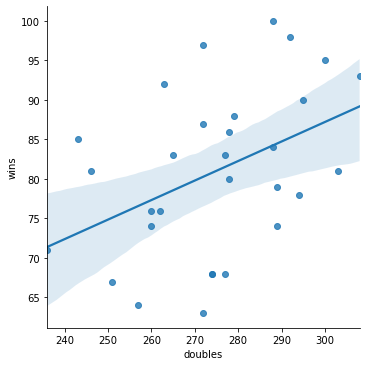

In [32]:
sns.lmplot(x='doubles',y='wins',data=df)

Number of wins increases with the increase in the number of doubles.

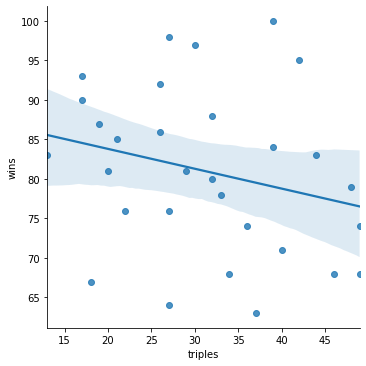

In [33]:
sns.lmplot(x='triples',y='wins',data=df)

There is a slight decrease in wins with increase in doubles but data is scattered with presence of outliers.

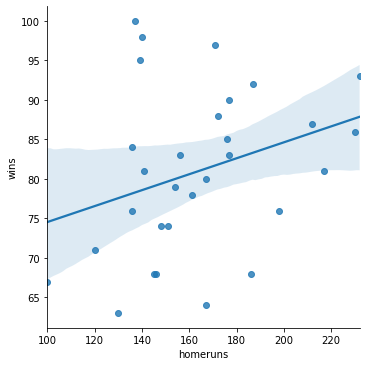

In [34]:
sns.lmplot(x='homeruns',y='wins',data=df)

Homeruns do not show much impact but as there no. increases so does the wins but outliers are also present

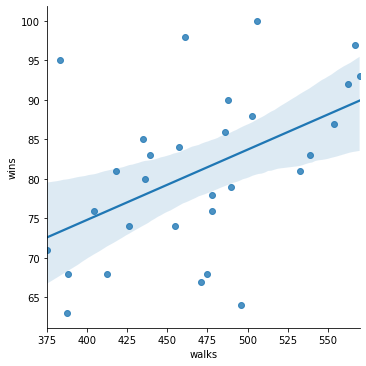

In [35]:
sns.lmplot(x='walks',y='wins',data=df)

As the no. of walks increases, wins also increases but outliers are also present.

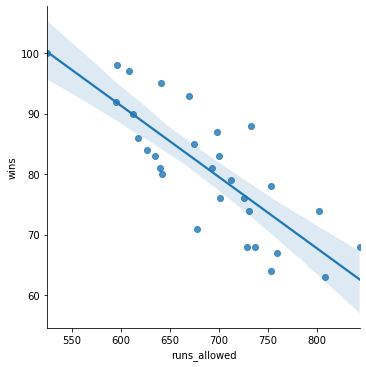

In [36]:
sns.lmplot(x='runs_allowed',y='wins',data=df)

If more runs are allowed no. of wins decreases.

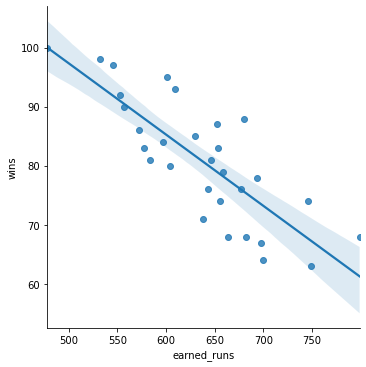

In [37]:
sns.lmplot(x='earned_runs',y='wins',data=df)

Wins also decreses as earned runs increases.

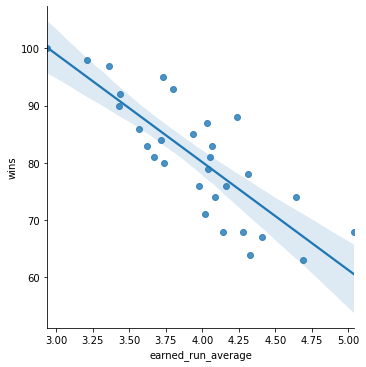

In [38]:
sns.lmplot(x='earned_run_average',y='wins',data=df)

Wins decreases as the average runs earned increases.

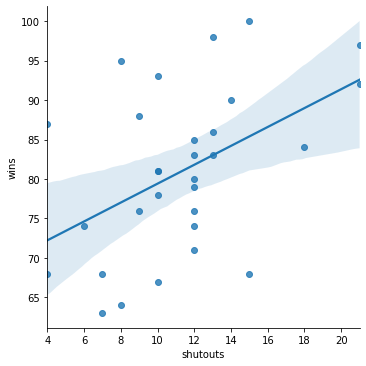

In [39]:
sns.lmplot(x='shutouts',y='wins',data=df)

Wins also increases with the increase in shutouts.

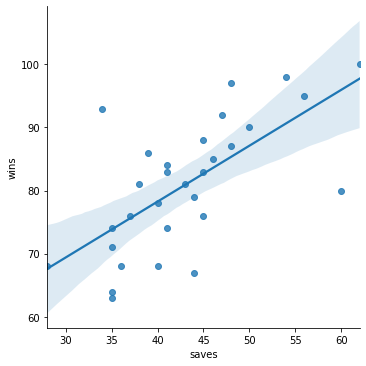

In [40]:
sns.lmplot(x='saves',y='wins',data=df)

Wins also increases as the no. of saves increases

### Multivariate Analysis

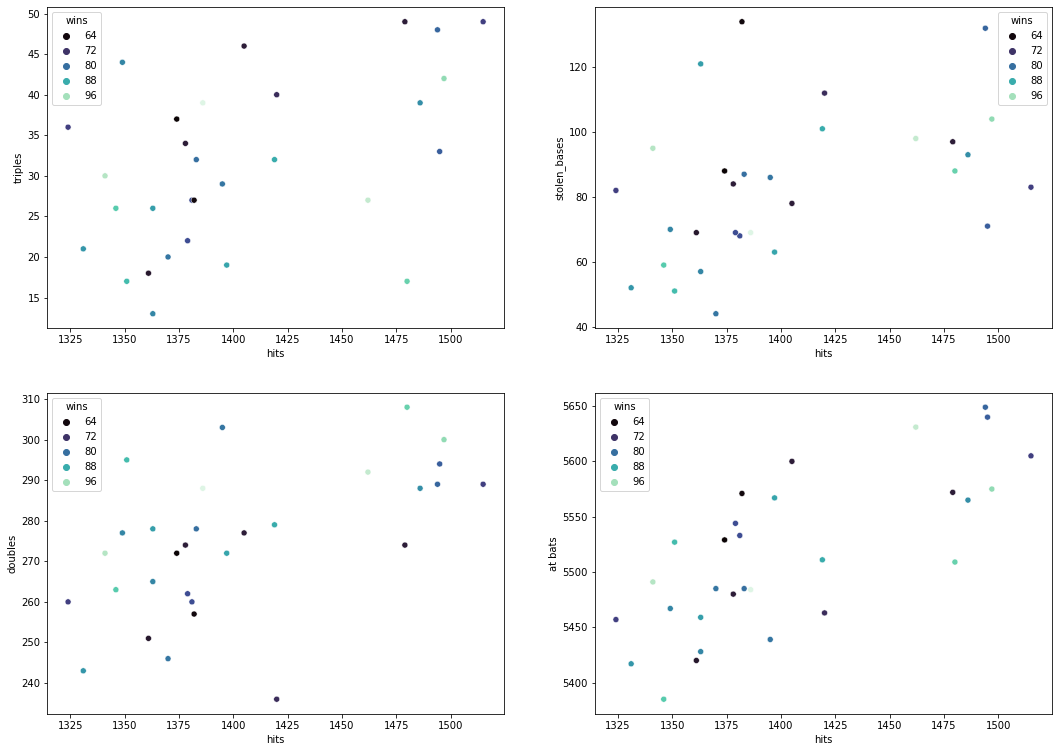

In [41]:
plt.figure(figsize=(18,13))
plt.subplot(2,2,1)
sns.scatterplot('hits','triples',hue='wins',data=df,palette='mako')
plt.subplot(2,2,2)
sns.scatterplot('hits','stolen_bases',hue='wins',data=df,palette='mako')
plt.subplot(2,2,3)
sns.scatterplot('hits','doubles',hue='wins',data=df,palette='mako')
plt.subplot(2,2,4)
sns.scatterplot('hits','at bats',hue='wins',data=df,palette='mako')

As the no.of hits increases so does the triples,doubles,at bats andstolen bases along with the number of wins but that is not constant as there are presence of outliers also.

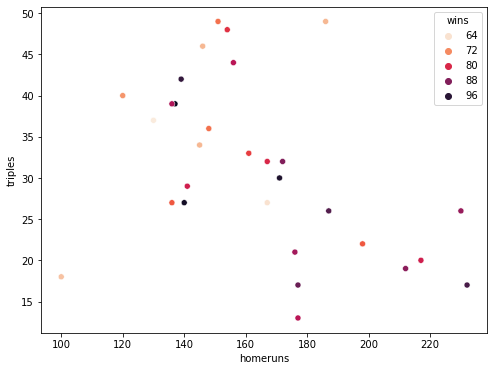

In [42]:
plt.figure(figsize=(8,6))
sns.scatterplot('homeruns','triples',hue='wins',data=df,palette='rocket_r')

As the home runs increase, number of triples decreases and on an average the no. of wins increases with presence of few outliers.

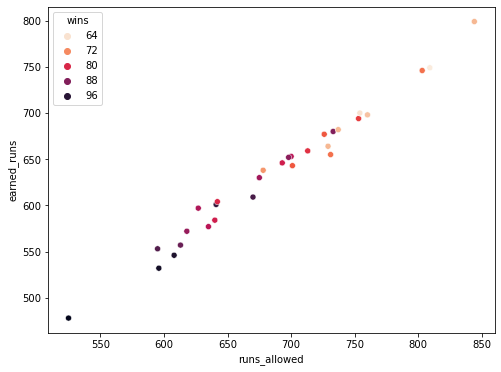

In [43]:
plt.figure(figsize=(8,6))
sns.scatterplot('runs_allowed','earned_runs',hue='wins',data=df,palette='rocket_r')

Runs allowed increases with earned runs but no. of wins decreases when these two feature show increase.

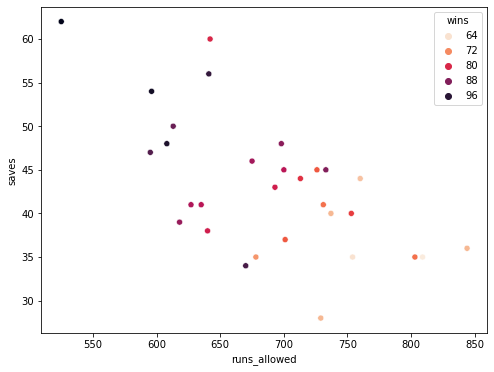

In [44]:
plt.figure(figsize=(8,6))
sns.scatterplot('runs_allowed','saves',hue='wins',data=df,palette='rocket_r')

Number of saves decreases when runs allowed are increase and so does the number of wins.

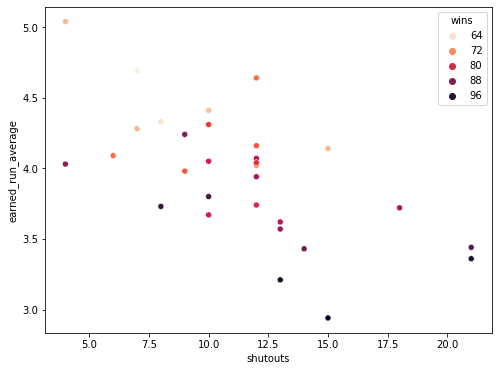

In [45]:
plt.figure(figsize=(8,6))
sns.scatterplot('shutouts','earned_run_average',hue='wins',data=df,palette='rocket_r')

Shutouts increases with decrease in earned run average while number of wins increases with it.

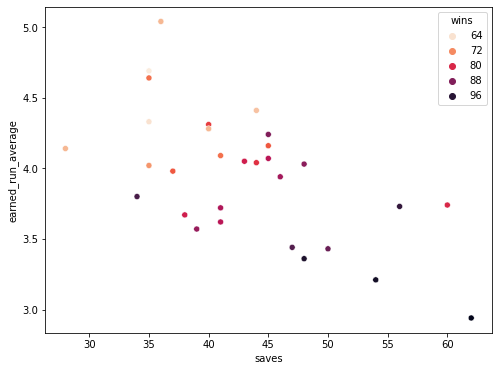

In [46]:
plt.figure(figsize=(8,6))
sns.scatterplot('saves','earned_run_average',hue='wins',data=df,palette='rocket_r')

As the earned run average decreases, saves increases and so does the no. of wins.

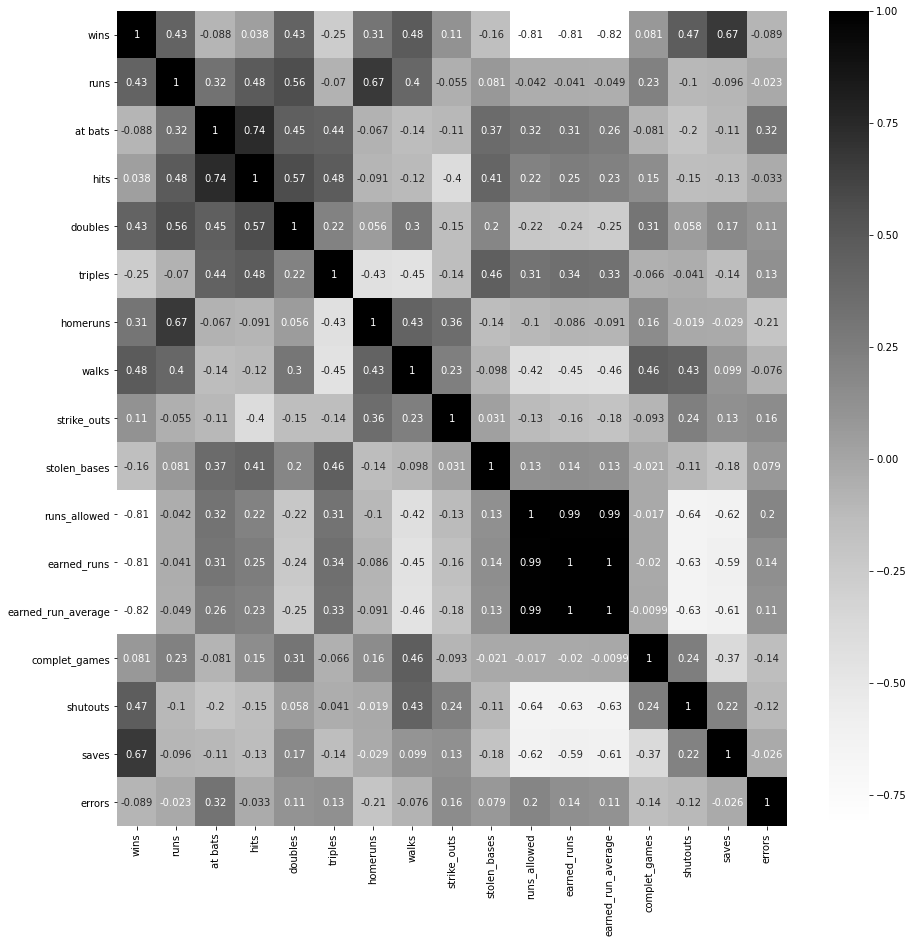

In [47]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='Greys')

Our label class 'wins' shows a strong positive correlation with saves, shutouts, walks, doubles and run while strong negative correlation with earned run average, earned runs and runs allowed. There are few independent features which show strong correlation with each other, we need to address these features cautiously to get good results.

# Feature Engineering

##### Removing Outliers

In [48]:
#Removing skewness with zscore method
from scipy.stats import zscore

In [49]:
def thresh(z):
    for i in np.arange(3,4,0.2):
        data=df.copy()
        data=data[(z<i).all(axis=1)]
        loss=(df.shape[0]-data.shape[0])/df.shape[0]*100
        print('For threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2)))

In [50]:
z=np.abs(zscore(df))
thresh(z)

For threshold 3.0 data loss is 3.33%
For threshold 3.2 data loss is 3.33%
For threshold 3.4 data loss is 3.33%
For threshold 3.6 data loss is 0.0%
For threshold 3.8 data loss is 0.0%


With threshold 3 data loss is 3.33% which is acceptable.

In [51]:
df=df[(z<3).all(axis=1)]
df.shape

(29, 17)

##### Removing skewness

In [52]:
from scipy.stats import boxcox

In [53]:
df['shutouts']=np.sqrt(df['shutouts'])
df['saves']=np.sqrt(df['saves'])
df['complet_games']=np.sqrt(df['complet_games'])
df['hits']=np.log(df['hits'])
df['errors'],l=boxcox(df['errors'])

Using different methods as one single method was incapable to remove skewness from all the column

In [54]:
df.skew()

wins                  0.119013
runs                 -0.215364
at bats               0.169573
hits                  0.738423
doubles              -0.335304
triples               0.090124
homeruns              0.450862
walks                 0.151193
strike_outs          -0.233815
stolen_bases          0.494966
runs_allowed          0.018155
earned_runs           0.018461
earned_run_average    0.016693
complet_games        -0.260678
shutouts             -0.085802
saves                 0.370280
errors                0.065150
dtype: float64

All the columns with highly skewed values have been handled.

##### Separating the dataset into dependent and independent variables.

In [55]:
x=df.iloc[:,1:]
y=df.iloc[:,0]
print(x.shape)
print(y.shape)

(29, 16)
(29,)


##### Scaling the dataset

In [56]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()

In [57]:
xd=mm.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

# Modelling Phase

Importing Neccessary modules

In [58]:
from sklearn.model_selection import train_test_split,cross_val_score

In [59]:
#importing models
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

In [60]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [61]:
#Choosing the best random state using Logistic regression
def randomstate(a,b):
    maxx=0
    for state in range(1,201):
        xtrain,xtest,ytrain,ytest=train_test_split(a,b,test_size=0.2,random_state=state)
        model=LinearRegression()
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        r2=r2_score(p,ytest)
        if maxx<r2:
            maxx=r2
            j=state
    return j

In [62]:
#Creating list of models and another list mapped to their names
models=[GaussianNB(),KNeighborsRegressor(),SVR(),LinearRegression(),Lasso(),Ridge(),ElasticNet(),DecisionTreeRegressor(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor()]

names=['GaussianNB','KNeighborsRegressor','SVR','LinearRegression','Lasso','Ridge','ElasticNet','DecisionTreeRegressor',
       'RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor','XGBRegressor']

In [63]:
def createmodels(model_list,independent,dependent,n):
    xtrain,xtest,ytrain,ytest=train_test_split(independent,dependent,test_size=0.2,random_state=randomstate(x,y))
    name=[]
    meanabs=[]
    meansqd=[]
    rootmeansqd=[]
    r2=[]
    mcv=[]
    
    #Creating models
    for i,model in enumerate(model_list):
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        score=cross_val_score(model,independent,dependent,cv=3)
        
        #Calculating scores of the model and appending them to a list
        name.append(n[i])
        meanabs.append(np.round(mean_absolute_error(p,ytest),4))
        meansqd.append(np.round(mean_squared_error(p,ytest),4))
        rootmeansqd.append(np.round(np.sqrt(mean_squared_error(p,ytest)),4))
        r2.append(np.round(r2_score(p,ytest),4)*100)
        mcv.append(np.round(np.mean(score),4)*100)
    
    #Creating Dataframe
    data=pd.DataFrame()
    data['Model']=name
    data['Mean Absolute Error']=meanabs
    data['Mean Squared Error']=meansqd
    data['Root Mean Squared Error']=rootmeansqd
    data['R2 Score']=r2
    data['Mean of Cross validaton Score']=mcv
    data.set_index('Model',inplace = True)
    return data
        

In [64]:
createmodels(models,x,y,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score
Model,,,,,
GaussianNB,18.3333,459.6667,21.4398,-1370.93,7.04
KNeighborsRegressor,8.3000,86.0067,9.2740,-140.54,25.68
SVR,11.8539,172.4125,13.1306,-9718.76,-19.58
LinearRegression,2.8449,10.5041,3.2410,93.16,-172.69
Lasso,10.7716,134.1041,11.5803,-1301.45,0.52
Ridge,5.9898,50.9624,7.1388,26.65,51.96
ElasticNet,11.5407,159.4199,12.6262,-5412.32,-8.00
DecisionTreeRegressor,8.8333,110.8333,10.5277,-20.62,-116.45
RandomForestRegressor,7.1100,70.7336,8.4103,-29.16,-8.13


Only Linear Regression seems to give a good score with respect to mae, mse and r3 score. Rest of the models have not performed so well, hence we further perform feature selection to get better efficiency.

# Feature Selection

##### Using Lasso

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
param_grid={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,0.1,1,5,10,15,20,30,35,45,50,55,65,100,110,150,1000]}
m1=GridSearchCV(Lasso(),param_grid,scoring='neg_mean_squared_error',cv=10)
m1.fit(x,y)
print(m1.best_params_)

{'alpha': 0.1}


In [67]:
m1=Lasso(alpha=0.001)
m1.fit(x,y)

Lasso(alpha=0.001)

In [68]:
importance = np.abs(m1.coef_)

In [69]:
dfcolumns = pd.DataFrame(x.columns)
dfimp=pd.DataFrame(importance)
featureScores = pd.concat([dfcolumns,dfimp],axis=1)
featureScores.columns = ['Features','Coefficients']  #naming the dataframe columns
featureScores

,Features,Coefficients
0,runs,24.359271
1,at bats,5.780052
2,hits,3.537461
3,doubles,7.659900
4,triples,0.936294
5,homeruns,5.659164
6,walks,4.962213
7,strike_outs,0.413636
8,stolen_bases,1.408642
9,runs_allowed,40.703689


In [70]:
featureScores.sort_values(by=['Coefficients'],ascending=False)

,Features,Coefficients
11,earned_run_average,73.175550
9,runs_allowed,40.703689
0,runs,24.359271
14,saves,21.407436
12,complet_games,7.990034
3,doubles,7.659900
1,at bats,5.780052
5,homeruns,5.659164
6,walks,4.962213
13,shutouts,3.913527


In [71]:
#Dropping the errors column to see the performance of the models
xlass0=x.drop('errors',axis=1)
createmodels(models,xlass0,y,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score
Model,,,,,
GaussianNB,18.3333,459.6667,21.4398,-1370.93,7.04
KNeighborsRegressor,8.3000,77.2067,8.7867,-127.38,-2.82
SVR,11.7488,169.6761,13.0260,-8383.83,-18.98
LinearRegression,2.4456,7.5756,2.7524,95.03,21.93
Lasso,10.7716,134.1041,11.5803,-1301.45,0.52
Ridge,5.9880,50.9350,7.1369,26.61,52.24
ElasticNet,11.5407,159.4199,12.6262,-5412.32,-8.00
DecisionTreeRegressor,7.8333,101.8333,10.0913,-16.75,-56.91
RandomForestRegressor,6.8917,72.9216,8.5394,-5.63,-6.46


Models perform a little better, so we try to remove one more features

In [72]:
xlass0=x.drop(['errors','strike_outs'],axis=1)
createmodels(models,xlass0,y,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score
Model,,,,,
GaussianNB,18.3333,459.6667,21.4398,-1370.93,7.04
KNeighborsRegressor,8.3000,77.2067,8.7867,-127.38,-5.89
SVR,11.6904,168.2483,12.9711,-7962.20,-17.88
LinearRegression,2.3459,7.2950,2.7009,95.35,26.49
Lasso,10.7716,134.1041,11.5803,-1301.45,0.52
Ridge,5.3336,40.6711,6.3774,45.51,59.18
ElasticNet,11.5149,158.5427,12.5914,-5309.85,-7.35
DecisionTreeRegressor,9.3333,122.3333,11.0604,-15.62,-31.80
RandomForestRegressor,6.6900,67.7011,8.2281,2.99,5.39


Performance of some model is increased hence we try to remove more features based on lasso coefiicient.

In [73]:
xlass0=x.drop(['errors','strike_outs','earned_runs'],axis=1)
createmodels(models,xlass0,y,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score
Model,,,,,
GaussianNB,18.3333,459.6667,21.4398,-1370.93,7.04
KNeighborsRegressor,7.8667,69.6133,8.3435,-128.65,-2.27
SVR,11.7011,168.9675,12.9988,-8410.59,-18.18
LinearRegression,2.1097,6.6533,2.5794,96.12,47.29
Lasso,10.7716,134.1041,11.5803,-1301.45,0.52
Ridge,5.7207,45.4797,6.7439,30.57,57.85
ElasticNet,11.7144,165.0607,12.8476,-8010.70,-10.51
DecisionTreeRegressor,5.5000,46.5000,6.8191,59.99,-22.25
RandomForestRegressor,6.7633,69.9773,8.3652,-13.21,9.57


Linear regression model shows much better results with the above 3 features removed.

##### Using features importances of Random Forest Regressor

In [74]:
model = RandomForestRegressor()
model.fit(x,y)

RandomForestRegressor()

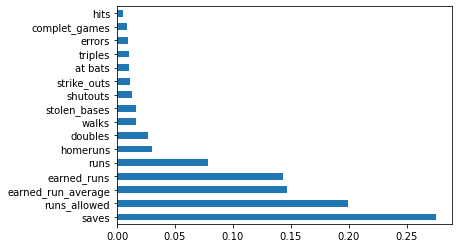

In [75]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

In [76]:
fi=list(feat_importances.nlargest(17).index)
fi

['saves',
 'runs_allowed',
 'earned_run_average',
 'earned_runs',
 'runs',
 'homeruns',
 'doubles',
 'walks',
 'stolen_bases',
 'shutouts',
 'strike_outs',
 'at bats',
 'triples',
 'errors',
 'complet_games',
 'hits']

In [77]:
xfi=x.drop('at bats',axis=1)
createmodels(models,xfi,y,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score
Model,,,,,
GaussianNB,18.3333,459.6667,21.4398,-1370.93,7.04
KNeighborsRegressor,9.1000,102.1267,10.1058,-224.33,13.08
SVR,11.9303,173.9564,13.1893,-9666.78,-20.01
LinearRegression,3.4519,13.6913,3.7002,91.38,-58.83
Lasso,10.7716,134.1041,11.5803,-1301.45,0.52
Ridge,5.9150,50.0413,7.0740,28.38,52.19
ElasticNet,11.5407,159.4199,12.6262,-5412.32,-8.00
DecisionTreeRegressor,7.1667,61.1667,7.8209,55.53,-55.13
RandomForestRegressor,7.0983,77.2017,8.7865,-17.52,-9.32


Models do not perform better with the above feature removed.

##### ANOVA Test

In [78]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [79]:
selection = SelectKBest(score_func=f_classif)
fit = selection.fit(x,y)

In [80]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
featureScores

,Features,Score
0,runs,2.485509
1,at bats,1.622586
2,hits,0.729065
3,doubles,0.799063
4,triples,0.811129
5,homeruns,0.818974
6,walks,0.943327
7,strike_outs,1.519889
8,stolen_bases,3.283197
9,runs_allowed,2.524616


In [81]:
featureScores.sort_values(by=['Score'],ascending=False)

,Features,Score
15,errors,4.330607
8,stolen_bases,3.283197
9,runs_allowed,2.524616
0,runs,2.485509
14,saves,2.356300
11,earned_run_average,1.732208
10,earned_runs,1.636442
1,at bats,1.622586
7,strike_outs,1.519889
13,shutouts,0.972748


In [82]:
xanova=x.drop('complet_games',axis=1)
createmodels(models,xanova,y,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score
Model,,,,,
GaussianNB,18.3333,459.6667,21.4398,-1370.93,7.04
KNeighborsRegressor,7.8667,78.9200,8.8837,-77.67,17.21
SVR,11.8186,171.3064,13.0884,-8838.56,-19.90
LinearRegression,3.9293,20.2030,4.4948,84.99,8.03
Lasso,10.7716,134.1041,11.5803,-1301.45,0.52
Ridge,5.8613,49.9677,7.0688,28.53,53.76
ElasticNet,11.5407,159.4199,12.6262,-5412.32,-8.00
DecisionTreeRegressor,9.8333,144.8333,12.0347,-21.82,-58.26
RandomForestRegressor,7.3350,79.3422,8.9074,-27.39,-24.60


##### Using Correlation

In [83]:
df.corr()

,wins,runs,at bats,hits,doubles,triples,homeruns,walks,strike_outs,stolen_bases,runs_allowed,earned_runs,earned_run_average,complet_games,shutouts,saves,errors
wins,1.000000,0.390451,-0.085780,-0.020787,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,-0.003340,0.477949,0.754886,-0.079645
runs,0.390451,1.000000,0.438022,0.432235,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.141559,-0.119300,0.071589,0.039883
at bats,-0.085780,0.438022,1.000000,0.770155,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.064516,-0.193987,-0.127766,0.332033
hits,-0.020787,0.432235,0.770155,1.000000,0.527354,0.579733,-0.219201,-0.221773,-0.373302,0.420201,0.243639,0.279955,0.255885,0.053243,-0.129257,-0.090742,-0.020030
doubles,0.384886,0.469293,0.490752,0.527354,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.256132,0.088345,0.258675,0.152572
triples,-0.206737,0.134204,0.445604,0.579733,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,0.009499,-0.067667,-0.236230,0.080503
homeruns,0.245697,0.586894,-0.064653,-0.219201,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.103823,-0.030256,0.084263,-0.165875
walks,0.447513,0.258450,-0.137850,-0.221773,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.446861,0.434799,0.197177,-0.056112
strike_outs,0.156469,0.081158,-0.111243,-0.373302,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.065802,0.200067,0.105667,0.164804
stolen_bases,-0.169503,0.075323,0.373674,0.420201,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.038446,-0.098740,-0.187605,0.070543


In [84]:
xcorr=x.drop(['complet_games','hits'],axis=1)
createmodels(models,xcorr,y,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score
Model,,,,,
GaussianNB,15.8333,362.1667,19.0307,-624.33,7.04
KNeighborsRegressor,8.1000,83.7533,9.1517,-147.11,6.58
SVR,11.8506,171.8445,13.1089,-8819.65,-19.12
LinearRegression,4.3513,25.9193,5.0911,75.76,4.44
Lasso,10.7716,134.1041,11.5803,-1301.45,0.52
Ridge,5.9342,51.1284,7.1504,25.69,52.79
ElasticNet,11.5407,159.4199,12.6262,-5412.32,-8.00
DecisionTreeRegressor,8.0000,102.3333,10.1160,-16.10,-79.23
RandomForestRegressor,7.1400,76.6511,8.7551,-26.56,-20.31


Selecting features on the basis of correlation dosent seem to increase performance of the models.

##### Conclusion

The Best performance we get is after removing columns 'errors', 'strike_outs' and  'earned_runs'.

# Hyperparameter Tuning

In [85]:
x_new=x.drop(['errors','strike_outs','earned_runs'],axis=1)

In [86]:
xtrain,xtest,ytrain,ytest=train_test_split(x_new,y,test_size=0.2,random_state=randomstate(x_new,y))

#### Linear Regression

In [87]:
params={'fit_intercept': [True,False],
       'normalize':[True,False]}

In [88]:
grid=GridSearchCV(LinearRegression(),params,cv=5)
grid.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [89]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'fit_intercept': True, 'normalize': True}
LinearRegression(normalize=True)
-0.22718266727614367


In [90]:
m=LinearRegression(fit_intercept= True, normalize= True)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x_new,y,cv=5)
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of Cross validation Score is',np.round(np.mean(score),3)*100)

Mean Absolute Error is 2.1097
Mean squared Error is 6.6533
Root Mean Squared Error is 2.5794
R2 score is 96.12
Mean of Cross validation Score is 38.5


#### Ridge

In [91]:
params={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,0.1,1,5,10,15,20,30,35,45,50,55,65,100,110,200,230,250,265,270,275,290,300,500,1000]}

In [92]:
grid=GridSearchCV(Ridge(),params,cv=5)
grid.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.1, 1, 5,
                                   10, 15, 20, 30, 35, 45, 50, 55, 65, 100, 110,
                                   200, 230, 250, 265, 270, 275, 290, 300, 500,
                                   1000]})

In [93]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'alpha': 1}
Ridge(alpha=1)
0.3427095081997095


In [94]:
m=Ridge(alpha=1)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x_new,y,cv=5)
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 score is',np.round(r2_score(p,ytest),2)*100)
print('Mean of Cross validation Score is',np.round(np.mean(score),3)*100)

Mean Absolute Error is 5.7207
Mean squared Error is 45.4797
Root Mean Squared Error is 6.7439
R2 score is 31.0
Mean of Cross validation Score is 34.8


#### Ada Boost using base estimator as LinearRegression model

In [95]:
param={'base_estimator':[LinearRegression(),Ridge(),Lasso(),ElasticNet()],
    'n_estimators':[50, 100, 150, 200, 250, 300],
       'learning_rate':[0.0001,0.001,0.01,.1,1,2,5,10],
      'n_estimators':[100,200,300,400,500]}

In [96]:
grid=GridSearchCV(AdaBoostRegressor(base_estimator=LinearRegression()),param,cv=5)
grid.fit(xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(base_estimator=LinearRegression()),
             param_grid={'base_estimator': [LinearRegression(), Ridge(),
                                            Lasso(), ElasticNet()],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5,
                                           10],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [97]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'base_estimator': Ridge(), 'learning_rate': 2, 'n_estimators': 200}
AdaBoostRegressor(base_estimator=Ridge(), learning_rate=2, n_estimators=200)
0.40664840859632967


In [98]:
m=AdaBoostRegressor(base_estimator=Ridge(), learning_rate=2,n_estimators=200)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x_new,y,cv=5)
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of Cross validation Score is',np.round(np.mean(score),3)*100)

Mean Absolute Error is 5.1897
Mean squared Error is 41.2372
Root Mean Squared Error is 6.4216
R2 score is 47.17
Mean of Cross validation Score is 16.1


#### Conclusion

Model giving the best performance is Linear Regression since it gives the minimum errors and highest r2 score and cross validation score compared to all the other models.

## Finalizing the best model

In [99]:
model=LinearRegression(fit_intercept= True, normalize= False)
model.fit(xtrain,ytrain)
p=model.predict(xtest)
score=cross_val_score(m,x_new,y,cv=2)

## Evaluation Metrics

In [100]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of Cross validation Score is',np.round(np.mean(score),3)*100)

Mean Absolute Error is 2.1097
Mean squared Error is 6.6533
Root Mean Squared Error is 2.5794
R2 score is 96.12
Mean of Cross validation Score is 46.400000000000006


Performance seems to be low as the data provided is very less. Data contains only 30 rows.

Text(0.5, 1.0, 'Gradient Boost Regressor')

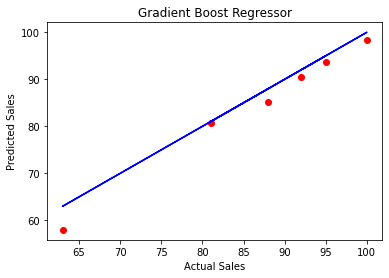

In [101]:
plt.scatter(x=ytest,y=p,color='r')
plt.plot(ytest,ytest,color='b')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Gradient Boost Regressor')

## Saving the model

In [102]:
import joblib
joblib.dump(model,'baseball.obj')

['baseball.obj']